Analysis of top 10 lists from the Examiner:

In [1]:
library(tidyverse)
library(tidytext)
#read in dates        
data <- read_csv("../input/examine-the-examiner/examiner-date-tokens.csv") %>%
#parse dates
mutate(publish_date=lubridate::ymd(publish_date))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  publish_date = col_double(),
  headline_tokens = col_character()
)



In [2]:
head(data)

publish_date,headline_tokens
<date>,<chr>
2010-01-01,100 most anticipated books releasing 2010
2010-01-01,10 best films of 2009 whats on your list
2010-01-01,10 days of free admission at lan su chinese garden to celebrate their 10th birthday
2010-01-01,10 playstation games to watch out for 2010
2010-01-01,10 resolutions for a happy new year for you and your dachshund
2010-01-01,10 tips to a healthy diet that works


In [3]:
# get just the rows with top 10 lists: ones that start with "10"
#name of the data frame
top_10_lists <- data %>%
#print strings that match
filter(stringr::str_detect(headline_tokens, "^10 ")) %>%
#print strings that do not match
filter(!stringr::str_detect(headline_tokens, "^10 000"))

Warning message:
“Ignoring unknown parameters: jitter”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



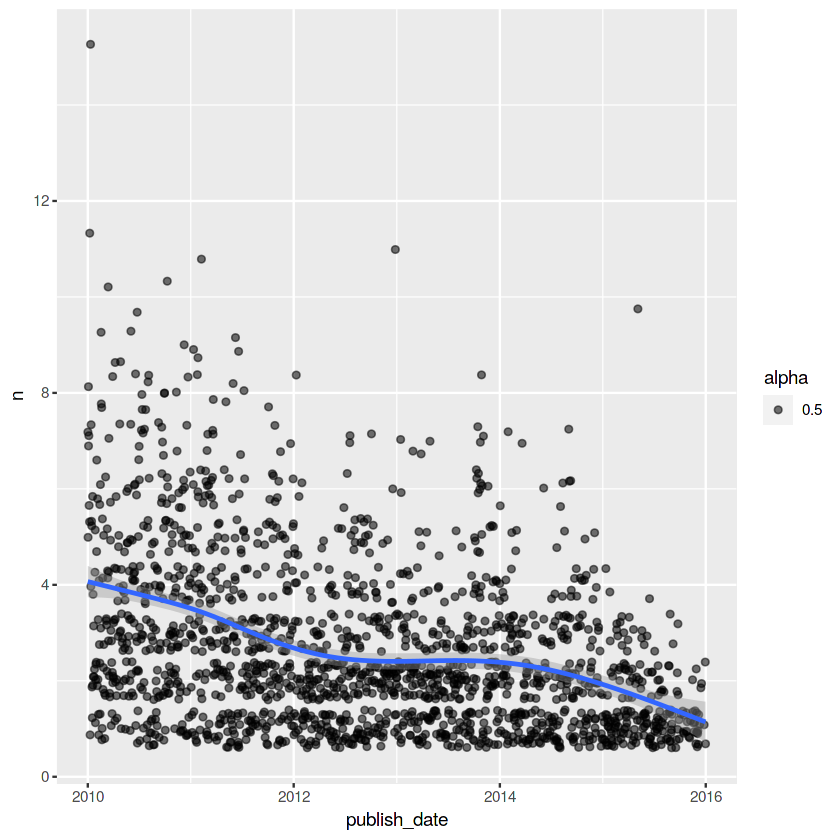

In [4]:
# plot the number of top 10 lists over time
top_10_lists %>%
    group_by(publish_date) %>%
    count() %>%
    ggplot(aes(x=publish_date,y=n)) +
    geom_jitter(aes(alpha=0.5), jitter=T) +
    geom_smooth() 

In [5]:
data(stop_words)

tidy_books <- tidy_books %>%
  anti_join(stop_words)

ERROR: Error in eval(lhs, parent, parent): object 'tidy_books' not found


In [6]:
# find most common words in top 10 list titles

data(stop_words)

most_common_top_10_words <- top_10_lists %>%
    unnest_tokens(word, headline_tokens) %>%
    anti_join(stop_words) %>%
    filter(word != "10") %>%
    count(word) %>%
    arrange(desc(n))

#look at most common 15 words
head (most_common_top_10_words, 15)

Joining, by = "word"



word,n
<chr>,<int>
questions,541
tips,492
author,299
historical,294
fiction,293
reasons,232
day,158
1,119
fun,114


In [7]:
head(top_10_lists) %>%
    group_by(lubridate::year(publish_date))%>%
    count()

lubridate::year(publish_date),n
<dbl>,<int>
2010,6


In [8]:
top_10_lists %>%
    group_by(year = lubridate::year(publish_date))%>%
    unnest_tokens(word, headline_tokens) %>%
    anti_join(stop_words) %>%
    filter(word != "10") %>%
    count(word) %>%
    arrange(desc(n)) %>%
    top_n(5)%>%
    arrange(year)

Joining, by = "word"

Selecting by n



year,word,n
<dbl>,<chr>,<int>
2010,tips,166
2010,reasons,65
2010,2010,61
2010,fun,54
2010,day,50
2011,tips,121
2011,questions,103
2011,reasons,46
2011,2011,45
